# Title: Github WebScrapping
### Submission by : Sai Manasa Ivaturi

## <p style="text-align: center;">Introduction</p>
Aim of this project is to develop a web scraper that is able to access and extract data from github topics (https://github.com/topics/python) to analyze co-relation of github stars/forks/contributors/commits. 

The core idea of our proposed project and its objectives is to know which github repositories are popular over internet and in executing what actions makes them popular. In knowing  so an individial can make their repositories reached out to more people with the help of this model.

We are using beautiful soup, lxml which are python libraries that is used for web scraping purposes to pull the data out of HTML and XML files. requests module to allow us send HTTP requests using Python. And pandas, seaborn libraries are used for visualization purposes. data cleaning and graphical summaries are performed by basic econometric methods. 

Let us see the step by step execution of this model.

import all the required packages and libraries.

In [1]:
!pip install bs4 lxml requests pandas

In [2]:
import requests
from bs4 import BeautifulSoup
from lxml import etree
import pandas as pd

### Analysis of Github

#### Analysis of Topics page(s):


A thorough analysis of github.com/topics/python page gave us an understanding of how the repos are lsited in that page.



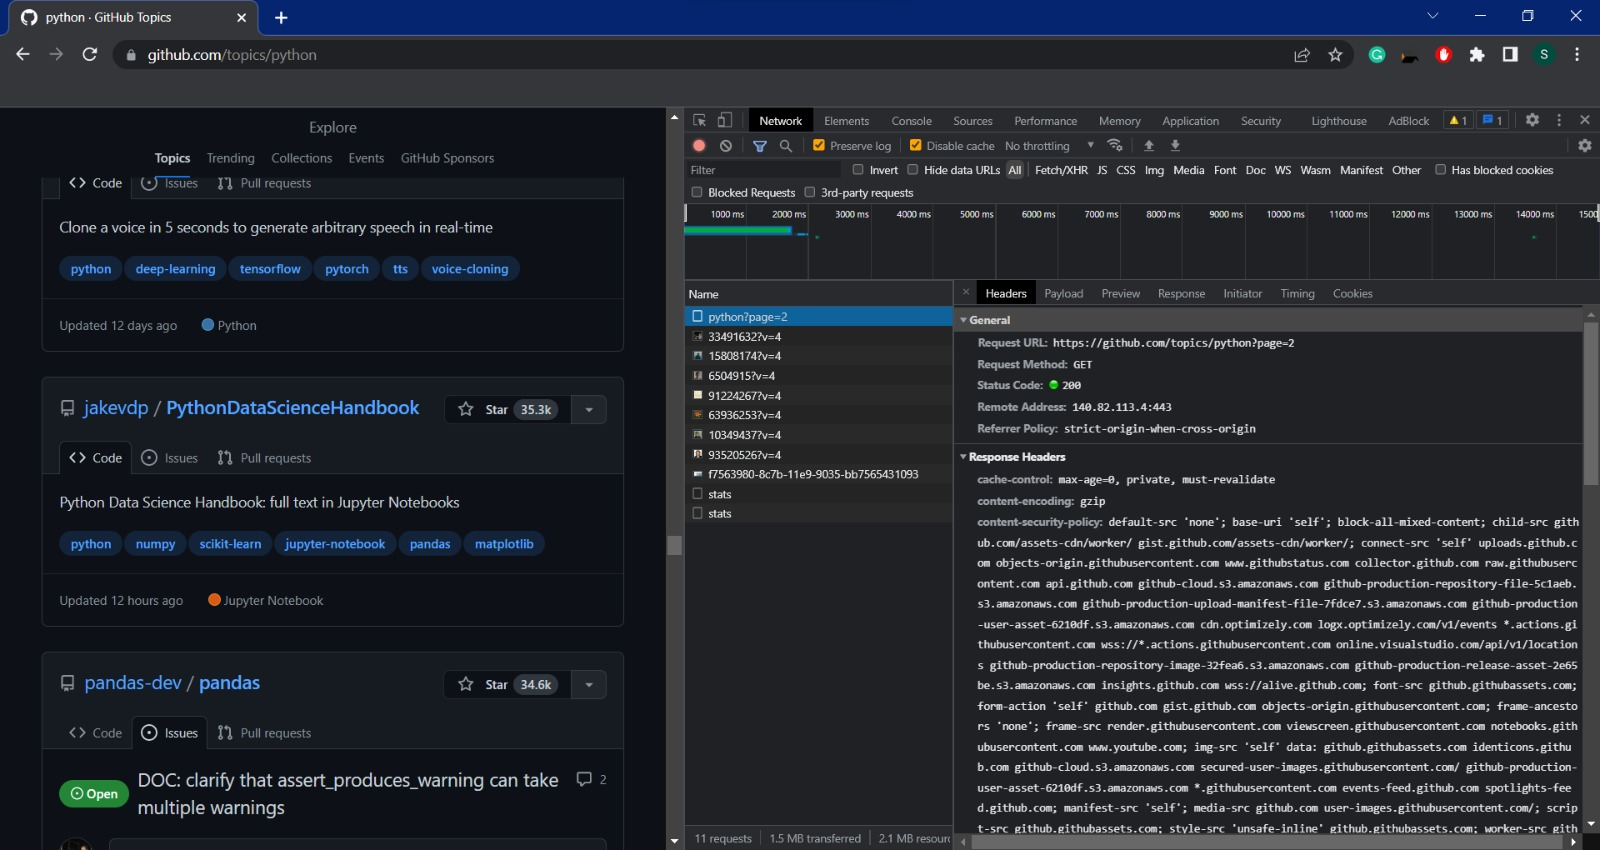

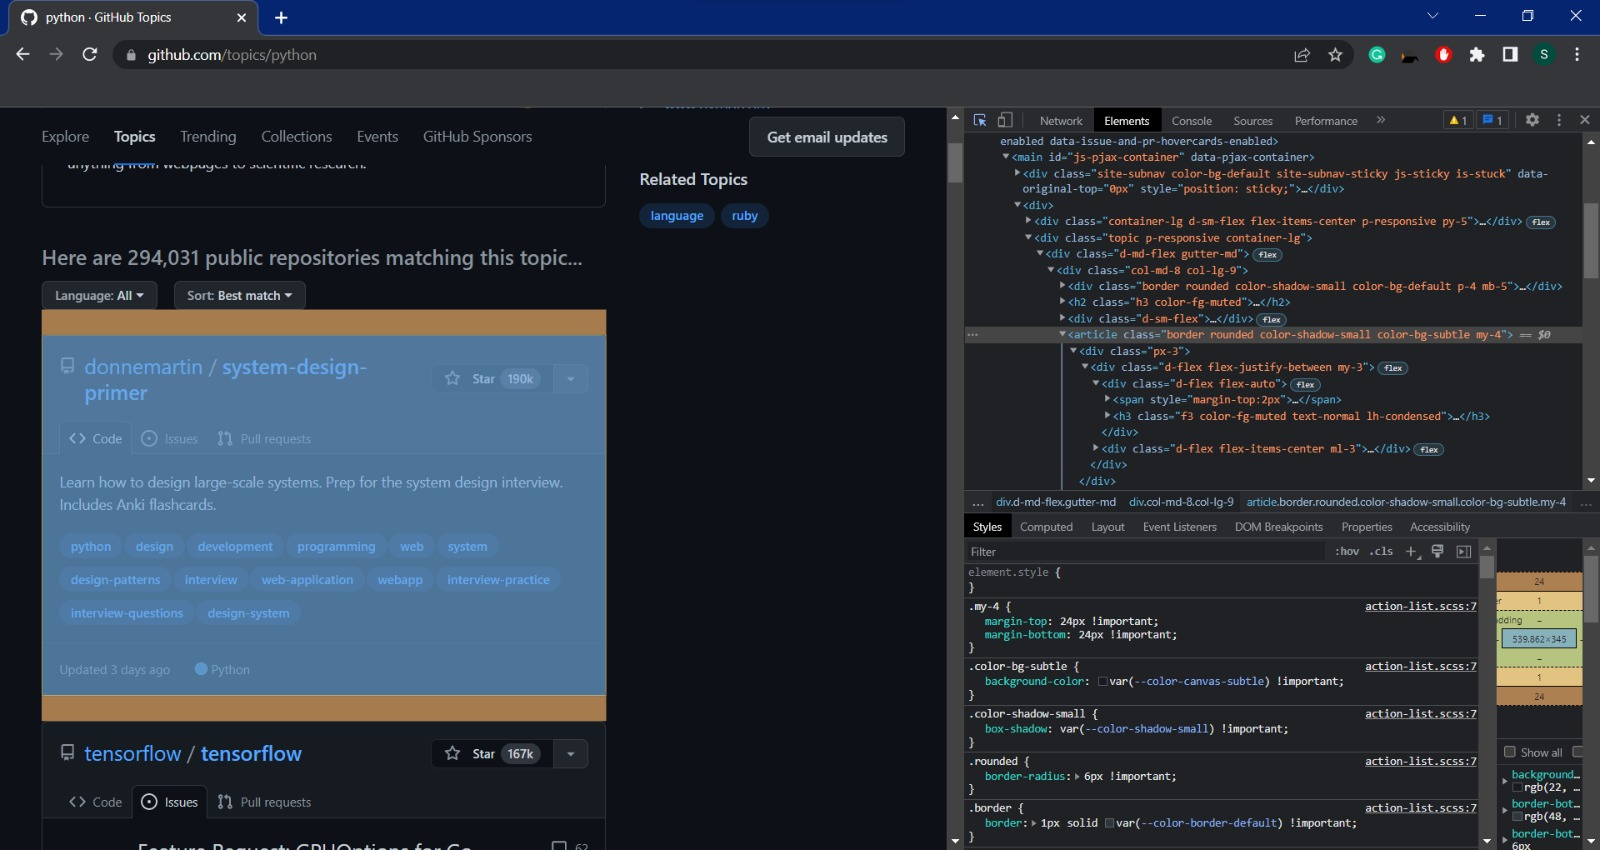

##### Observations :
 - All hrefs in this page are present in the HTML tag called as "articles"
 - All these are loaded from the URL -> github.com/topics/python?page=`pagenumber`
 - All these pages can be downloaded independently and there is no need for infinite scroll

#### Analysis of each repo:

Each repo comes as a html from which our desired stats can be picked up,

Desired stats and their description is given below

| Attribute    | Description                                                  |
|--------------|--------------------------------------------------------------|
| stars        | number of people who liked or found a particular repo useful |
| commits      | number of commits made to the git repo                       |
| forks        | number of forked projects from the repo                      |
| used_by      | number of DEPENDANT repos on the current repo                |
| last_commit  | most recent push to the repo                                 |
| repo name    | name of the GitHub repo                                      |
| releases     | number of packages released by repo on the Github            |
| contributors | number of people contributing to a repo                      |


Also each of these attributes can be found from the HTML via its xpath


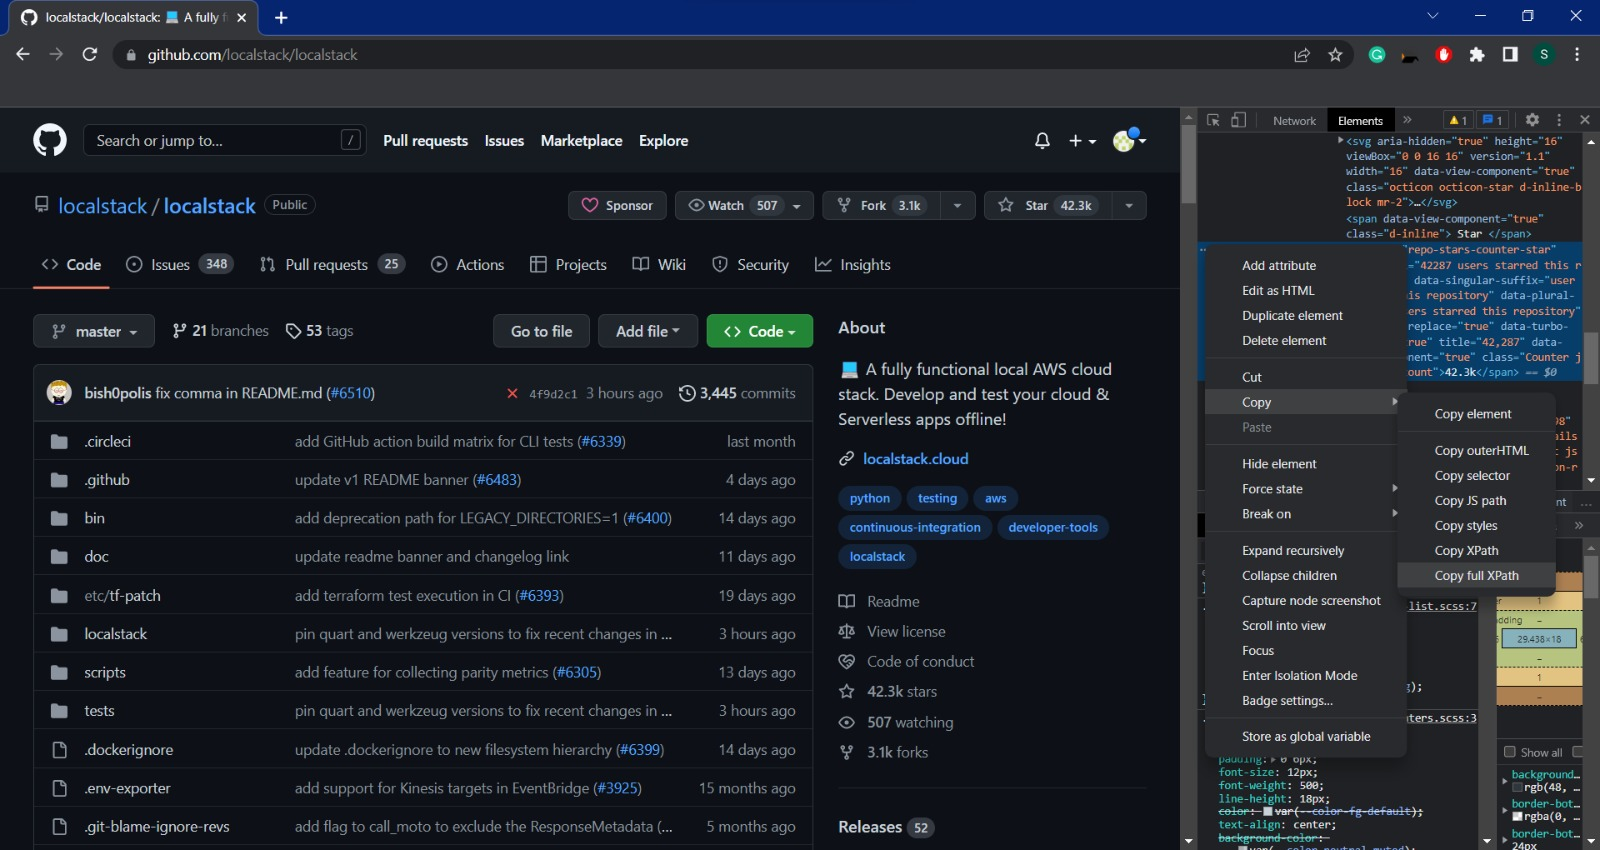


## <p style="text-align: center;">Execution of project</p>
Create a class called Topics and 
1. write function make_requests for accessing HTML content of webpage and parse the data using Beautiful Soup. Now, we need to navigate and search for the required data through the parsed tree from body, main to get all articles from page in loops. Remove not required articles.
2. generate_urls function to access all pages and send it to make_requests function. 
3. save_hrefs functions to save all the hrefs of topics in a file.

In [3]:
class Topics:
    """
    This is a class to get the list of all hrefs from github.com/topics/python
    """

    def __init__(self):
        self.url = "https://github.com/topics/python"
        self.hrefs = set()
        self.filename = "hrefs.txt"

    def make_request(self, url):
        """
        This method makes a request to the given URL
        and gets the list of all topics and adds them to class variable
        :param url: github topics page
        :return:
        """
        print(url)
        temp_response = requests.get(url)
        #print(temp_response.__dict__)
        if temp_response.status_code != 200:
            return False

        soup = BeautifulSoup(temp_response.content, "html.parser")

        for i in soup.find("body").find("main").find_all("article"):
            all_hrefs = i.find_all("a", href=True)

            for j in range(0, len(all_hrefs)):
                if all_hrefs[j]["href"].count(
                        "/") == 2 and "topics" not in all_hrefs[j]["href"]:
                    self.hrefs.add(all_hrefs[j]["href"])
                    #yield all_hrefs[j]["href"]
        return True

    def generate_urls(self,stop_after):
        """
        Generates urls
        :return:
        """
        #stop_after = 5
        while self.make_request(self.url + "?page=" + str(stop_after)):
            if stop_after<=1:
                break
            stop_after -= 1

    def save_hrefs(self):
        """
        saves hrefs to a file
        :return: boolean
        """
        with open(self.filename, "a+") as file:
            file.write("\n".join(list(self.hrefs)))
            file.close()
            return True
        return False


In [4]:
hrefs = Topics()

In [5]:
hrefs.generate_urls(stop_after=10)

https://github.com/topics/python?page=10
https://github.com/topics/python?page=9
https://github.com/topics/python?page=8
https://github.com/topics/python?page=7
https://github.com/topics/python?page=6
https://github.com/topics/python?page=5
https://github.com/topics/python?page=4
https://github.com/topics/python?page=3
https://github.com/topics/python?page=2
https://github.com/topics/python?page=1


In [6]:
hrefs.hrefs

{'/3b1b/manim',
 '/521xueweihan/HelloGitHub',
 '/AkashSingh3031/The-Complete-FAANG-Preparation',
 '/ArchiveBox/ArchiveBox',
 '/Asabeneh/30-Days-Of-Python',
 '/AtsushiSakai/PythonRobotics',
 '/Avik-Jain/100-Days-Of-ML-Code',
 '/Ciphey/Ciphey',
 '/CoatiSoftware/Sourcetrail',
 '/CorentinJ/Real-Time-Voice-Cloning',
 '/CyC2018/CS-Notes',
 '/Delgan/loguru',
 '/DeviaVir/zenbot',
 '/EpistasisLab/tpot',
 '/FavioVazquez/ds-cheatsheets',
 '/Gallopsled/pwntools',
 '/GitHubDaily/GitHubDaily',
 '/GokuMohandas/Made-With-ML',
 '/HelloZeroNet/ZeroNet',
 '/InstaPy/InstaPy',
 '/Jack-Cherish/python-spider',
 '/JaidedAI/EasyOCR',
 '/Kr1s77/awesome-python-login-model',
 '/Lightning-AI/lightning',
 '/MLEveryday/100-Days-Of-ML-Code',
 '/MagicStack/uvloop',
 '/ManimCommunity/manim',
 '/Manisso/fsociety',
 '/Miserlou/Zappa',
 '/MobSF/Mobile-Security-Framework-MobSF',
 '/MorvanZhou/tutorials',
 '/MrS0m30n3/youtube-dl-gui',
 '/OpenBB-finance/OpenBBTerminal',
 '/OpenMined/PySyft',
 '/PaddlePaddle/Paddle',
 '/PostH

Now that we have all articles hrefs, we have to get respective tags for each article.
Create a Class called PageDetails to get the xpaths of stars, forks, commits, last-commits, releases, used_by, contributers of article.

In [7]:
class PageDetails:
    def __init__(self, url, repo_name):
        self.xpaths = {
            "stars": '//*[@id="repo-stars-counter-star"]',
            "forks": '//*[@id="repo-network-counter"]',
            "commits": '//*[@id="repo-content-pjax-container"]'
                       '/div/div/div[3]/div[1]/div[2]/div[1]'
                       '/div/div[4]/ul/li/a/span/strong',
            "last_commit": '//*[@id="repo-content-pjax-container"]'
                           '/div/div/div[3]/div[1]/div[2]/div[1]/'
                           'div/div[2]/div[2]/a[2]/relative-time',
            "releases": '//*[@id="repo-content-pjax-container"]'
                        '/div/div/div[3]/div[2]/div/div[2]/div/h2/a/span',
            "used_by": '//*[@id="repo-content-pjax-container"]'
                       '/div/div/div[3]/div[2]/div/div[4]/div/h2/a/span',
            "contributors": '//*[@id="repo-content-pjax-container"]'
                            '/div/div/div[3]/div[2]/div/div[5]/div/h2/a/span',
        }
        self.make_request(url)
        self.responses = {"repo": repo_name, "status": self.response_status}
        self.url = url
        self.repo_name = repo_name
        for i in self.xpaths:
            try:
                self.responses.update(
                    {i: self.dom.xpath(self.xpaths[i])[0].text})
            except BaseException:
                self.responses.update({i: ""})

    def make_request(self, url):
        try:
            response = requests.get(url)
            self.response_status = response.status_code
            self.dom = etree.HTML(
                str(BeautifulSoup(response.content, "html.parser")))
        except BaseException:
            self.dom = etree.HTML("")
            self.response_status = response.status_code

The extracted data is appended to repo_dict for each article that is stored in hrefs.txt in Topics. we are also ensuring that there are no duplicate data stored in case.

In [8]:
repo_dict = {}

In [9]:
base_url = "https://github.com"
# with open("hrefs.txt") as file:
for i in hrefs.hrefs:
    print("checking ",base_url+i)
    try:
        if i in repo_dict and repo_dict[i].responses["status"]!=200:
            repo_dict[i].make_request(base_url+i.strip())
        elif i in repo_dict and repo_dict[i].responses["status"]==200:
            print(i,"in repo already")
        else:
            repo_dict[i] = PageDetails(base_url+i.strip(),i.strip())
    except:
        print(i,"error")
        continue

checking  https://github.com/encode/httpx
checking  https://github.com/ManimCommunity/manim
checking  https://github.com/sponsors/python
checking  https://github.com/lk-geimfari/awesomo
checking  https://github.com/sponsors/sqlmapproject
checking  https://github.com/cs01/gdbgui
checking  https://github.com/quantopian/zipline
checking  https://github.com/sponsors/kitao
checking  https://github.com/google/python-fire
checking  https://github.com/practical-tutorials/project-based-learning
checking  https://github.com/CoatiSoftware/Sourcetrail
checking  https://github.com/binux/pyspider
checking  https://github.com/PaddlePaddle/Paddle
checking  https://github.com/sponsors/tiangolo
checking  https://github.com/hardikvasa/google-images-download
checking  https://github.com/kitao/pyxel
checking  https://github.com/Python-World/python-mini-projects
checking  https://github.com/coleifer/peewee
checking  https://github.com/pyecharts/pyecharts
checking  https://github.com/facebook/buck
checking  

There are in total 1079 rows of articles and its tags

In [10]:
len(repo_dict)

342

Now using pandas we will create Data frame for returning detailed information

In [11]:
df = pd.DataFrame([repo_dict[i].responses for i in repo_dict])

In [12]:
df

,repo,status,stars,forks,commits,last_commit,releases,used_by,contributors
0,/encode/httpx,200,9k,602,"1,167","Jul 21, 2022",37,0,24.6k
1,/ManimCommunity/manim,200,10.7k,934,"5,588","Jul 22, 2022",21,,321
2,/sponsors/python,200,,,,,,,
3,/lk-geimfari/awesomo,200,8.5k,622,,,,,
4,/sponsors/sqlmapproject,200,,,,,,,
...,...,...,...,...,...,...,...,...,...
337,/MLEveryday/100-Days-Of-ML-Code,200,19k,5.3k,323,"Apr 6, 2022",,,20
338,/cookiecutter/cookiecutter,200,17.6k,1.7k,"2,960","Jul 3, 2022",21,13.1k,268
339,/waditu/tushare,200,11.7k,4.2k,412,"Mar 4, 2020",1,1.2k,22
340,/allenai/allennlp,200,11.1k,2.2k,"2,711","Jul 15, 2022",58,257,


dataframe is saved to a csv called csv_data.csv

In [13]:
# df.to_csv("csv_data.csv")

Now that we have all required data, we will clean the data to make it ready for analysis
1. drop the content which are invalid or which does not return 200.

In [14]:
last_commit = df["last_commit"]
repo = df["repo"]
print(df.shape)
df.drop(df[df['status'] != 200].index, inplace = True)
df = df.drop(["repo"],axis=1)
df =df.drop(['last_commit'], axis=1)
df =df.drop(['status'], axis=1)
print(df.shape)

(342, 9)
(255, 6)


2. Replace Null or empty fields with 0 to avoid errors while analyzing the data

In [15]:
df = df.apply(lambda x: x.str.strip()).replace('', '0')

In [16]:
df

,stars,forks,commits,releases,used_by,contributors
0,9k,602,"1,167",37,0,24.6k
1,10.7k,934,"5,588",21,0,321
2,0,0,0,0,0,0
3,8.5k,622,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
337,19k,5.3k,323,0,0,20
338,17.6k,1.7k,"2,960",21,13.1k,268
339,11.7k,4.2k,412,1,1.2k,22
340,11.1k,2.2k,"2,711",58,257,0


3. write a function clean to make all the data into integer. example, we have star value as 50.8k which cannot be complied by system. hence we to replace strings 'k', ',','m'  into  000 000000

In [17]:
def clean(x):
    return x.replace(".","")[:-1] if "." in x else x
for i in df.columns:
    df[i]=df[i].replace({',': '',"k": '000',"m":"000000"}, regex=True)
    df[i]=df[i].apply(clean)
#     print(df)

In [18]:
convert_dict = {"stars":int,"forks":int,"commits":int,"releases":int,"contributors":int,"used_by":int}
df = df.astype(convert_dict)  

In [19]:
df["repo"]=repo

4. replace last_commit to datetime format 

In [20]:
last_commit = last_commit.replace("","Jan 01, 2000")

In [21]:
df["last_commit"] = pd.to_datetime(last_commit, format="%b %d, %Y")

In [22]:
df = df[~(df['last_commit'] < '2018-01-01')]

## <p style="text-align: center;">Results and Visualizations</p>

Now lets Analyse the data
1. using describe we get a data frame as below for each tag.

   <td> 
    <ul>count - The number of not-empty values</ul>
    <ul>mean - The average (mean) value</ul>
    <ul>std - The standard deviation</ul>
    <ul>min - the minimum value</ul>
    <ul>25% - The 25% percentile</ul>
    <ul>50% - The 50% percentile</ul>
    <ul>75% - The 75% percentile</ul>
    <ul>max - the maximum value</ul>
    </td>

In [23]:
df.describe()

,stars,forks,commits,releases,used_by,contributors
count,205.000000,205.000000,205.000000,205.000000,2.050000e+02,2.050000e+02
mean,19769.756098,4312.482927,7200.678049,31.546341,2.526991e+04,3.083439e+04
std,21908.807488,6236.149958,15163.329427,52.596541,1.466296e+05,1.439638e+05
min,7700.000000,317.000000,21.000000,0.000000,0.000000e+00,0.000000e+00
25%,9300.000000,1300.000000,615.000000,0.000000,0.000000e+00,0.000000e+00
50%,12700.000000,2500.000000,2314.000000,14.000000,0.000000e+00,5.600000e+01
75%,20600.000000,4500.000000,6023.000000,44.000000,3.110000e+02,3.070000e+02
max,190000.000000,48500.000000,148966.000000,429.000000,1.400000e+06,1.100000e+06


2. find out the correlation between the tags. 

In [24]:
df.corr()

,stars,forks,commits,releases,used_by,contributors
stars,1.000000,0.869381,0.062132,-0.076166,0.109226,0.068474
forks,0.869381,1.000000,0.242491,-0.110547,0.077354,0.197277
commits,0.062132,0.242491,1.000000,0.209849,-0.013885,0.254729
releases,-0.076166,-0.110547,0.209849,1.000000,-0.048003,0.115215
used_by,0.109226,0.077354,-0.013885,-0.048003,1.000000,-0.036454
contributors,0.068474,0.197277,0.254729,0.115215,-0.036454,1.000000


2. For a better understanding of correlation between tags, lets import seaborn to produce heat map for visualization purposes.
From heatmap we can see that there is a highest correlation between stars and forks, lowest between releases and contributors

<AxesSubplot:>

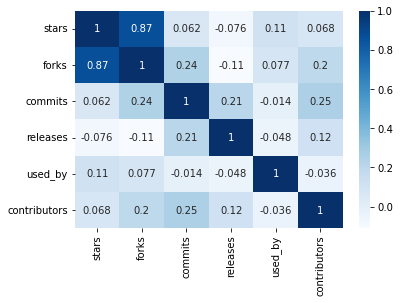

In [25]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

3. Plot graph to understand what actions may impacts  other actions.

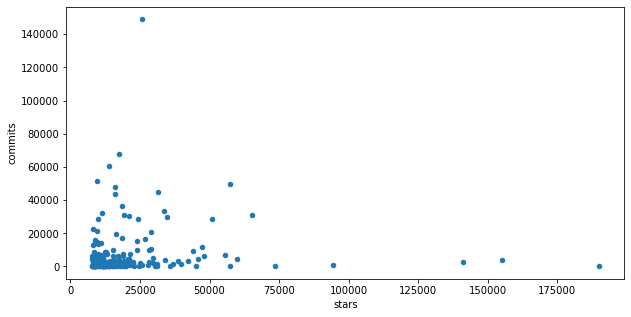

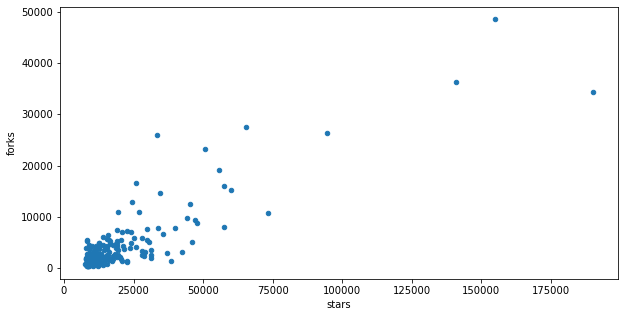

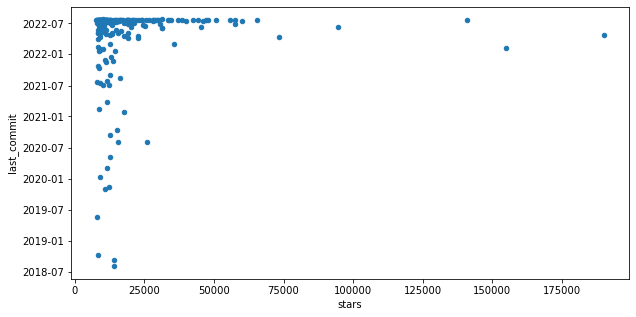

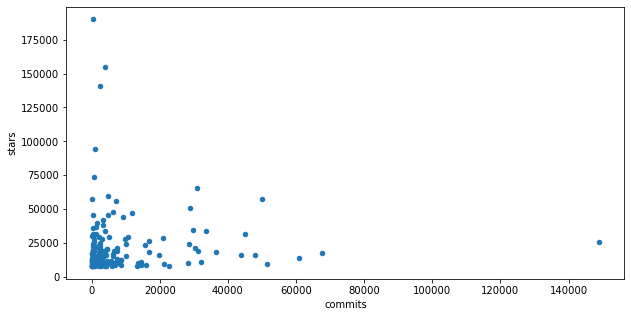

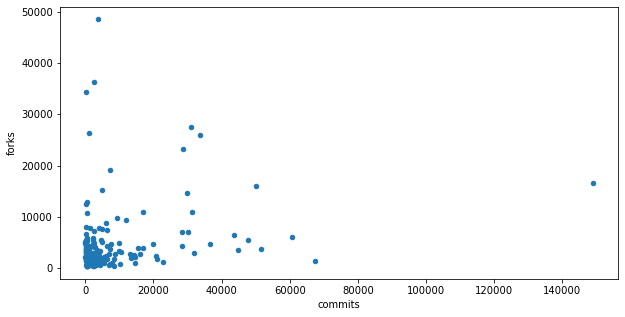

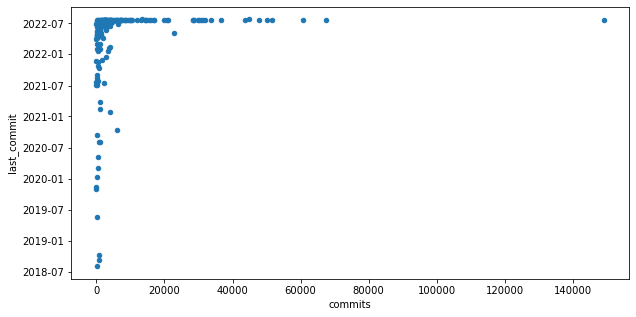

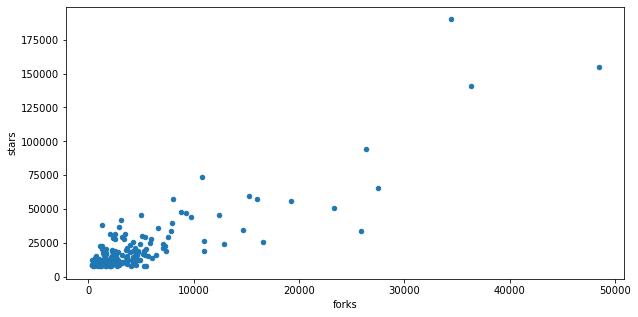

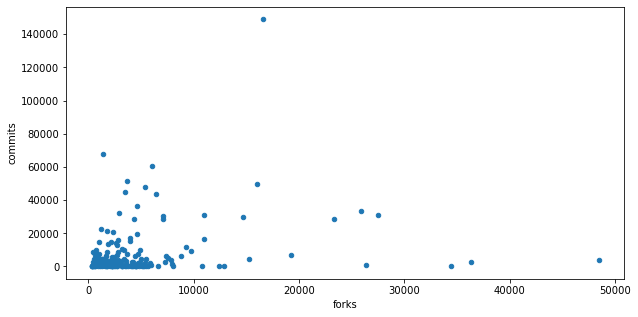

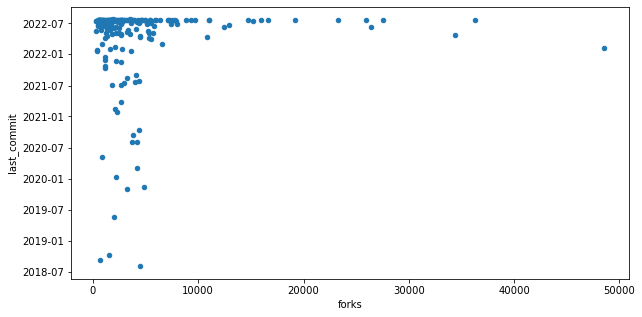

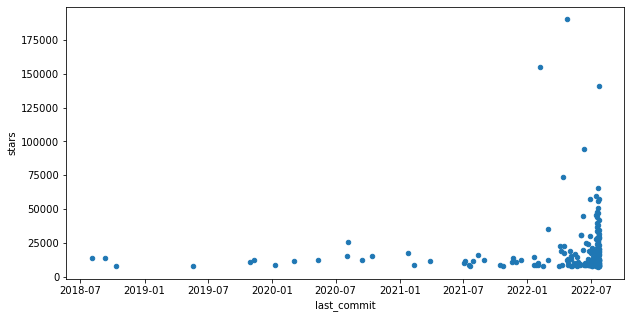

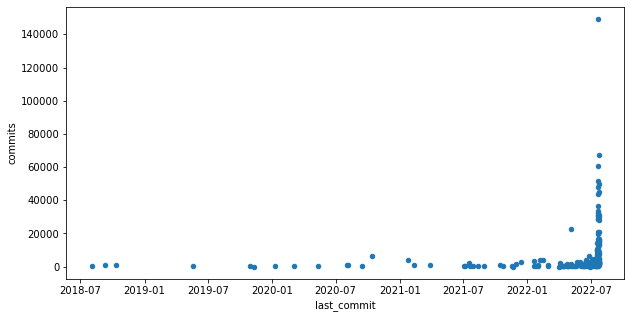

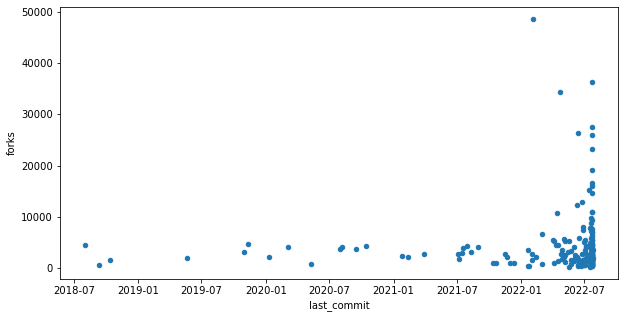

In [26]:
# i = "used_by"
for i in ["stars","commits","forks","last_commit"]:
    for j in ["stars","commits","forks","last_commit"]:
        if i==j:
            continue    
        df.plot.scatter(x=i, y=j, figsize=(10,5))
    #         df.plot(x=i, y=j, figsize=(20,10))

From above generated graphs, here are the actions that  have understandable correlation.
- plot between commits and stars - highest number of commits has highest number of stars and also few least commits have highest stars


<AxesSubplot:xlabel='stars', ylabel='commits'>

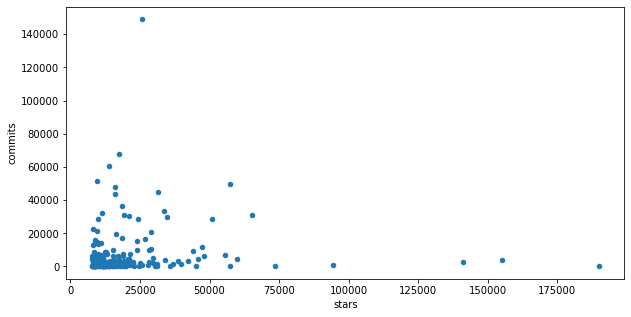

In [27]:
df.plot.scatter(x="stars",y="commits",figsize=(10,5))

- plot between stars and forks - highest number of forks has highest number of stars.

<AxesSubplot:xlabel='stars', ylabel='forks'>

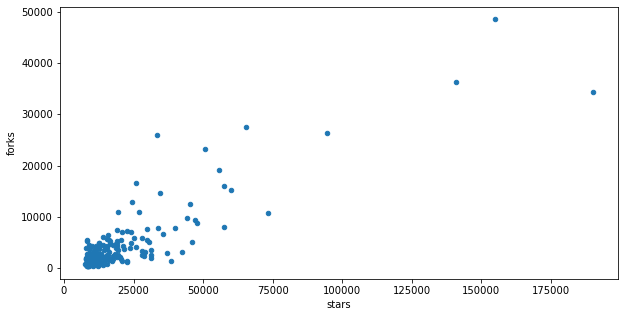

In [28]:
df.plot.scatter(x="stars",y="forks",figsize=(10,5))

- plot between stars and last-commit - most recent commit has most number of stars and also there can be less number of stars to recent commit.

<AxesSubplot:xlabel='last_commit', ylabel='stars'>

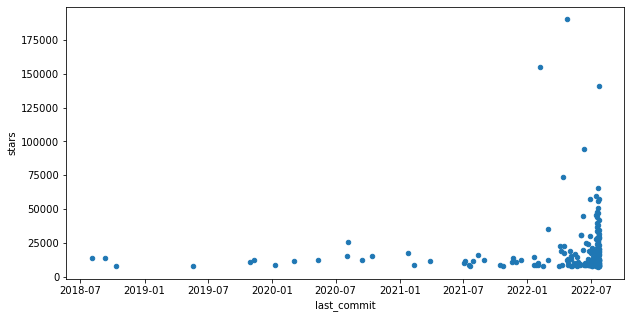

In [29]:
df.plot.scatter(x="last_commit",y="stars",figsize=(10,5))

In [30]:
df

,stars,forks,commits,releases,used_by,contributors,repo,last_commit
0,9000,602,1167,37,0,24600,/encode/httpx,2022-07-21
1,10700,934,5588,21,0,321,/ManimCommunity/manim,2022-07-22
5,8700,519,431,9,181,40,/cs01/gdbgui,2022-06-22
6,15300,4400,6226,13,858,120,/quantopian/zipline,2020-10-14
8,22700,1300,265,8,12200,48,/google/python-fire,2022-04-16
...,...,...,...,...,...,...,...,...
337,19000,5300,323,0,0,20,/MLEveryday/100-Days-Of-ML-Code,2022-04-06
338,17600,1700,2960,21,13100,268,/cookiecutter/cookiecutter,2022-07-03
339,11700,4200,412,1,1200,22,/waditu/tushare,2020-03-04
340,11100,2200,2711,58,257,0,/allenai/allennlp,2022-07-15


- plot between used_by and last_commit - most recent commits has highest number of useage 

<AxesSubplot:xlabel='last_commit', ylabel='used_by'>

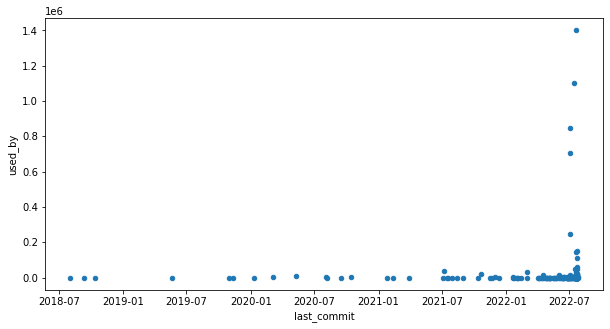

In [31]:
df.plot.scatter(x="last_commit",y="used_by",figsize=(10,5))

- plot between used_by and stars -  In this graph we observe that number of usage does not affect stars

<AxesSubplot:xlabel='stars', ylabel='used_by'>

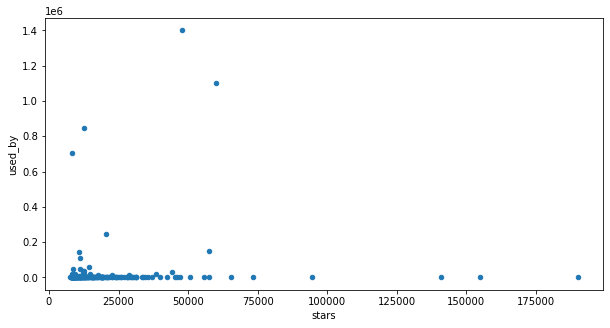

In [32]:
df.plot.scatter(x="stars",y="used_by",figsize=(10,5))

## <p style="text-align: center;">Summary</p>

<p style="text-align: center;">Hence from above graphs, we can summarise that more recent the commit is more is the usage.
more recent the commit is the more likely to get more stars. more the number of stars more will be the forks.</p>

#### References:
    Course Modules
    Official Documentation
    geeksforgeeks.com